In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

%config InlineBackend.figure_format = 'svg'


Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
# definindo hyperparametros
learning_rate = 0.01
epochs = 200

In [12]:
n_samples = 30
train_x = np.linspace(0, 20, n_samples)
train_y = 3 * train_x + 4 * np.random.randn(n_samples)

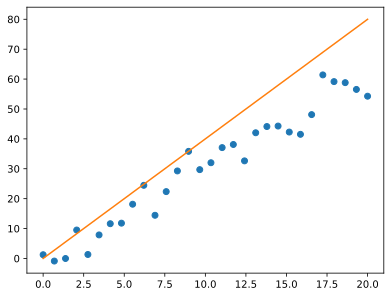

In [27]:
plt.plot(train_x, train_y, 'o')
plt.plot(train_x, 4 * train_x)
plt.show()

In [22]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W = tf.Variable(np.random.randn(), name='weights')
B = tf.Variable(np.random.randn(), name='bias')

In [24]:
# definindo função linear
# pred = X * W + B
pred = tf.add(tf.multiply(X,W),B)

# definindo a função de custo: para minimizar 
cost = tf.reduce_sum((pred - Y)**2)/ (2*n_samples)

#definindo o otimizador: 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


In [25]:
# train
init = tf.global_variables_initializer()

epoch: 0000 c=59.6640 w=2.1775 b=0.1122
epoch: 0020 c=9.1517 w=3.0118 b=0.1469
epoch: 0040 c=9.1452 w=3.0140 b=0.1129
epoch: 0060 c=9.1393 w=3.0161 b=0.0806
epoch: 0080 c=9.1340 w=3.0180 b=0.0500
epoch: 0100 c=9.1292 w=3.0199 b=0.0210
epoch: 0120 c=9.1249 w=3.0217 b=-0.0066
epoch: 0140 c=9.1209 w=3.0234 b=-0.0327
epoch: 0160 c=9.1174 w=3.0250 b=-0.0576
epoch: 0180 c=9.1142 w=3.0265 b=-0.0812


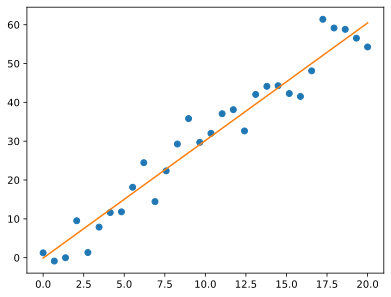

In [26]:
with tf.Session() as sesh:
    sesh.run(init)

    for epoch in range(epochs):
        for x, y in zip(train_x, train_y):
            sesh.run(optimizer, feed_dict={X:x, Y:y})

        if not epoch % 20:
            c = sesh.run(cost, feed_dict={X: train_x, Y: train_y})
            w = sesh.run(W)
            b = sesh.run(B)
            print(f'epoch: {epoch:04d} c={c:.4f} w={w:.4f} b={b:.4f}')

    weight = sesh.run(W)
    bias = sesh.run(B)
    plt.plot(train_x, train_y, 'o')
    plt.plot(train_x, weight * train_x + bias)
    plt.show()

In [28]:
# How to use tensorflow.Session()

# Define a simple computational graph
a = tf.constant(5)
b = tf.constant(3)
c = a + b

# Create a session to execute the graph
with tf.Session() as sess:
    result = sess.run(c)
    print(result)  # Output: 8

8
